In [75]:
#Initial imports
import pandas as pd                     #Panda library
import numpy as np                      #Numpy library
import datetime as dt                   #Date time library
from pathlib import Path                #Path library
import plotly.express as px             #Plotly library
import hvplot.pandas                    #HVPlot library
import hvplot as hv                         #HVPlot Library
import panel as pn                      #Panel library
from matplotlib import rcParams

from panel.interact import interact     #Import interact
pn.extension("plotly")

%matplotlib inline

In [76]:
# Reading CO2 Global Data
co2_global_csv = Path("co2_global_data.csv")
co2_global = pd.read_csv(co2_global_csv,index_col='Year', parse_dates=True, usecols=['Year', 'Total CO2'])
co2_global

,Total CO2
Year,
1850-01-01,196.896032
1851-01-01,198.804976
1852-01-01,207.550944
1853-01-01,217.209248
1854-01-01,255.138976
...,...
2016-01-01,35452.459300
2017-01-01,35925.737690
2018-01-01,36646.139790


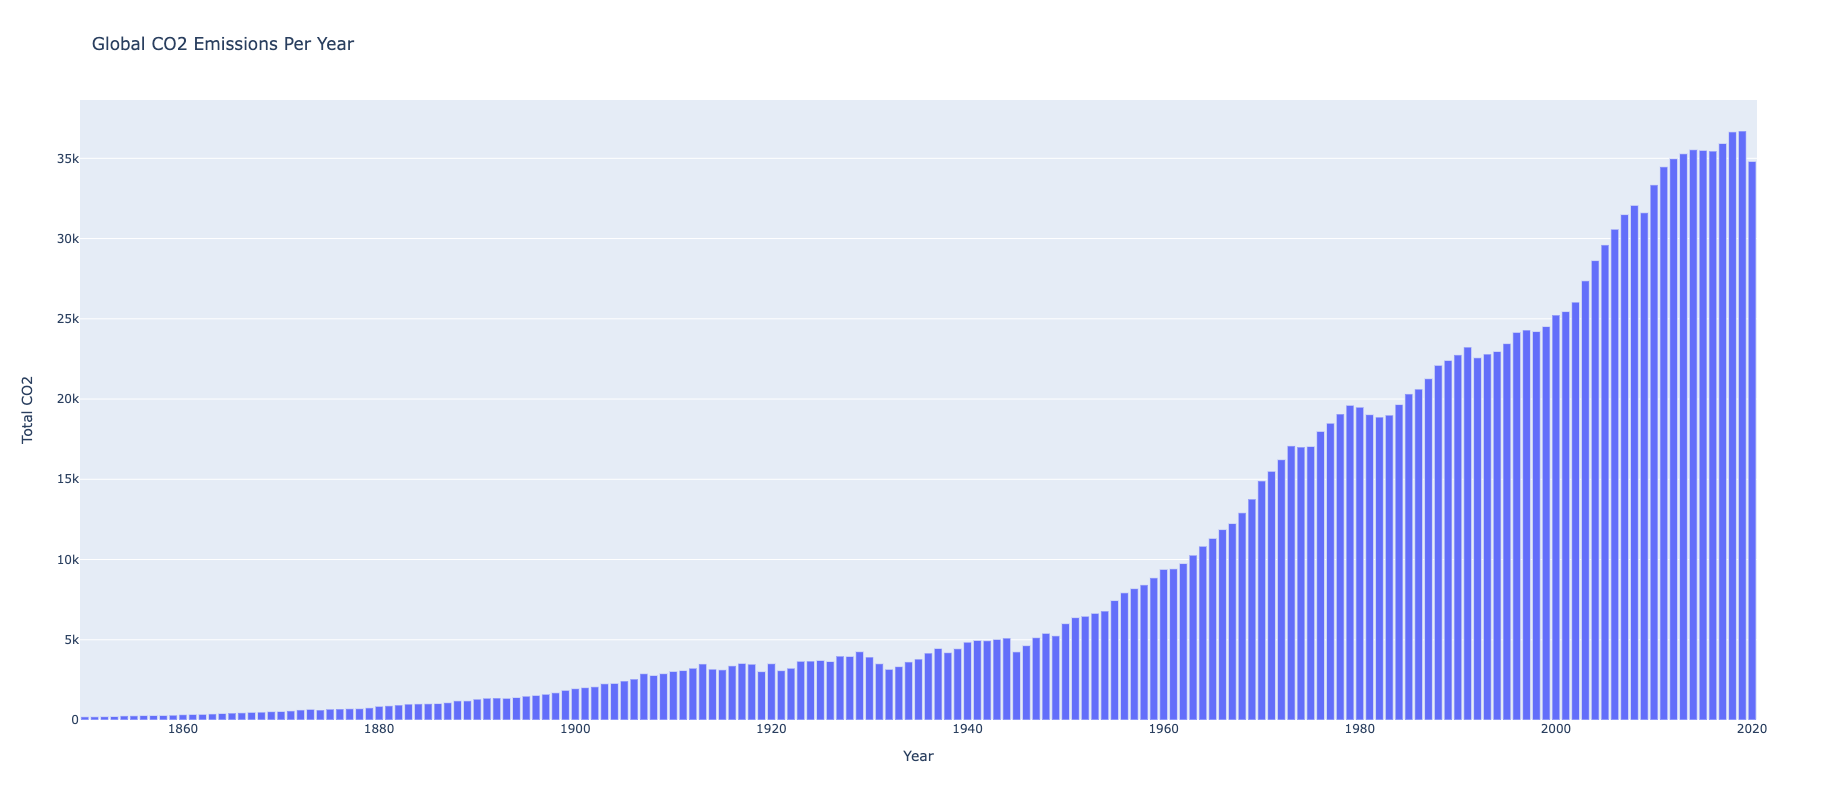

In [77]:
co2_per_year = co2_global.groupby("Year").sum().reset_index()
co2_plot = px.bar(
    co2_per_year, x="Year", y="Total CO2", title="Global CO2 Emissions Per Year", width=1500, height=800
)
co2_plot

In [78]:
# Reading CO2 Global Data Per Capita
co2_percapita_csv = Path("co2_global_data.csv")
co2_percapita = pd.read_csv(co2_percapita_csv,index_col='Year', parse_dates=True, usecols=['Year', 'CO2 Per Capita'])
co2_percapita

,CO2 Per Capita
Year,
1850-01-01,0.155935
1851-01-01,0.156647
1852-01-01,0.162709
1853-01-01,0.169417
1854-01-01,0.197994
...,...
2016-01-01,4.749780
2017-01-01,4.759726
2018-01-01,4.802215


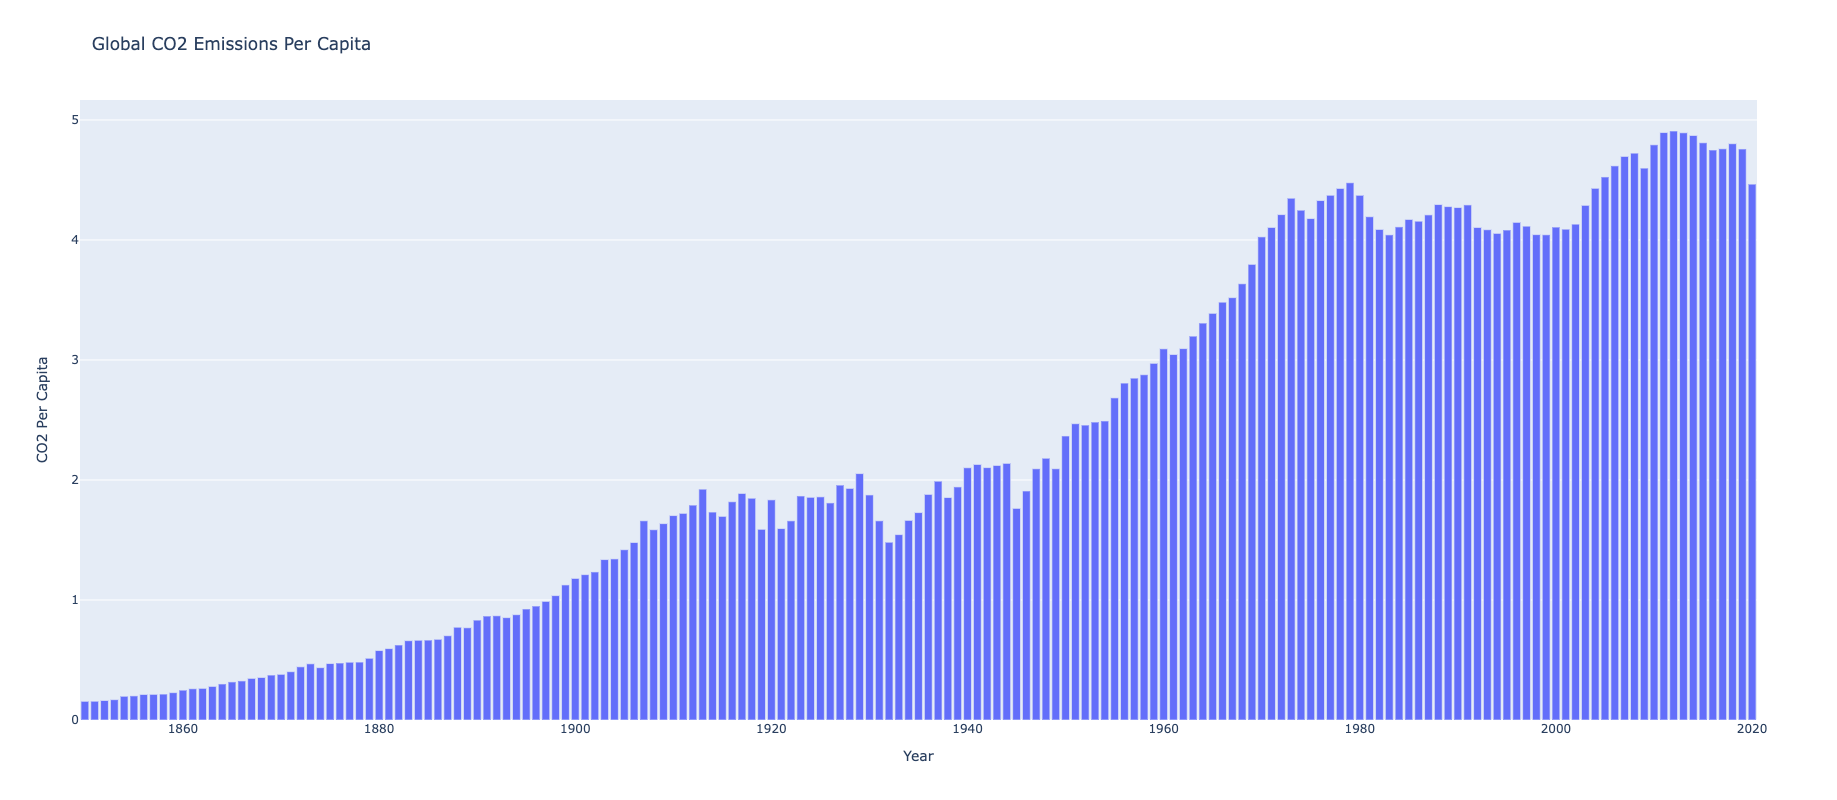

In [79]:
co2_per_capita = co2_percapita.groupby("Year").sum().reset_index()
co2_per_capita_plot = px.bar(
    co2_per_capita, x="Year", y="CO2 Per Capita", title="Global CO2 Emissions Per Capita", width=1500, height=800
)
co2_per_capita_plot

In [80]:
temp_change=pd.read_csv("Temperature.csv",index_col="Date",parse_dates=True)
temp_change

,Temperature Change
Date,
Jan 80,0.287
Feb 80,0.482
Mar 80,0.131
Apr 80,0.519
May 80,0.518
...,...
Aug 20,1.193
Sep 20,1.516
Oct 20,1.159


In [81]:
temp_change_min = temp_change.min()
temp_change_max = temp_change.max()
temp_change_avg = temp_change.mean()

In [82]:
print(f"Maximum {temp_change_max}%")
print(f"Minimum {temp_change_min}%")
print(f"Avg {temp_change_avg}%")

Maximum Temperature Change    2.27
dtype: float64%
Minimum Temperature Change   -0.571
dtype: float64%
Avg Temperature Change    0.745801
dtype: float64%


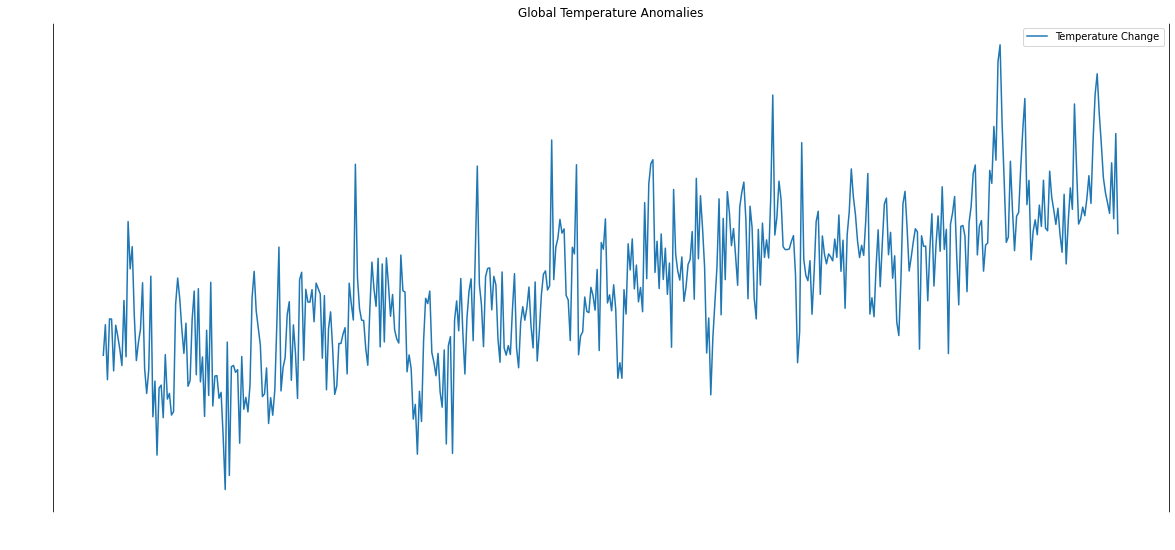

In [83]:
import matplotlib.pyplot as plt
temp_change_plot = temp_change.plot(y='Temperature Change', title="Global Temperature Anomalies", figsize=(20, 9), kind="line", ylabel='Temperature Change', xlabel='Years')
temp_change_plot.spines['bottom'].set_color('white')
temp_change_plot.spines['top'].set_color('white')
temp_change_plot.xaxis.label.set_color('white')
temp_change_plot.yaxis.label.set_color('white')
temp_change_plot.tick_params(axis='x', colors='white')
temp_change_plot.tick_params(axis='y', colors='white')
plt.savefig('Temperaturechange.png')